In [153]:
print("Hi, we are Anuja and Nisa! Welcome to our INST737 project!")

Hi, we are Anuja and Nisa! Welcome to our INST737 project!


In [154]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy as sp
import statsmodels.api as sm


import umap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans


from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation 

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

from sklearn.ensemble import RandomForestClassifier

from google.colab import files

In [155]:
#@title Combining multiple files for different years
#uploaded_files_22 = files.upload()
#uploaded_files_19 = files.upload()
#uploaded_files_20 = files.upload()

#salary_22 = pd.read_csv((io.BytesIO(uploaded_files_22['Data_INST737Project_1.csv'])), encoding='cp1252')
#salary_20 = pd.read_csv((io.BytesIO(uploaded_files_20['Data_INST737Project_2020.csv'])), encoding='cp1252')
#salary_19 = pd.read_csv((io.BytesIO(uploaded_files_19['Data_INST737Project_2019.csv'])), encoding='cp1252')


The below lines of code were used to combine files from multiple survey responses over the years (2018-2022) and merge them into one file, exported as "Combined_Salary.csv" which will be used hereafter for the rest of the project runs

In [156]:

#salary_22 = pd.read_csv('Data_INST737Project_1.csv', encoding='cp1252')
#salary_20 = pd.read_csv('Data_INST737Project_2020.csv', encoding='cp1252')
#salary_19 = pd.read_csv('Data_INST737Project_2019.csv', encoding='cp1252')

#salary_22.head()

# renaming the Survey year colname in 2020 data
#salary_20.rename(columns = {'ï»¿Survey Year' :'Survey Year'})
#salary = salary_22.append([salary_20, salary_19], ignore_index = True)
#list(salary.columns)

#salary.to_csv('Combined_Salary.csv', index = False)


In [157]:
#@title Data Assessment 
salary_raw = pd.read_csv('/content/Combined_Salary.csv', encoding='cp1252')


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,15,19,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [158]:
salary_raw.head()

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,NewestVersionInProduction,OldestVersionInProduction,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2021,12/10/2020 8:22,65000,Sweden,NaN,Microsoft SQL Server,4,Microsoft SQL Server,Full time employee,"Developer: Business Intelligence (SSRS, PowerB...",...,SQL Server 2016,SQL Server 2016,"<= 20,000 (town)",Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1.0
1,2021,12/10/2020 8:23,145000,United States,76063,Microsoft SQL Server,15,Azure SQL DB (any flavor),Full time employee,DBA (Production Focus - build & troubleshoot s...,...,SQL Server 2019,SQL Server 2014,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1.0
2,2021,12/10/2020 8:23,105000,United States,43240,Microsoft SQL Server,12,"PostgreSQL, Azure SQL DB (any flavor)",Full time employee,DBA (General - splits time evenly between writ...,...,SQL Server 2017,SQL Server 2008R2,300K-1M (large city),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1.0
3,2021,12/10/2020 8:23,46482,United Kingdom,NaN,Microsoft SQL Server,10,Azure SQL DB (any flavor),Full time employee,DBA (Production Focus - build & troubleshoot s...,...,SQL Server 2019,SQL Server 2012,300K-1M (large city),"Education (K-12, college, university)",Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1.0
4,2021,12/10/2020 8:24,98800,United States,468,Microsoft SQL Server,5,DB2,Full time employee,"Developer: Business Intelligence (SSRS, PowerB...",...,SQL Server 2019,SQL Server 2012,100K-299K (city),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1.0


In [159]:
salary = salary_raw[salary_raw.Country=='United States']

In [160]:
salary.shape

(21494, 31)

In [161]:
salary.head()

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,NewestVersionInProduction,OldestVersionInProduction,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
1,2021,12/10/2020 8:23,145000,United States,76063,Microsoft SQL Server,15,Azure SQL DB (any flavor),Full time employee,DBA (Production Focus - build & troubleshoot s...,...,SQL Server 2019,SQL Server 2014,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1.0
2,2021,12/10/2020 8:23,105000,United States,43240,Microsoft SQL Server,12,"PostgreSQL, Azure SQL DB (any flavor)",Full time employee,DBA (General - splits time evenly between writ...,...,SQL Server 2017,SQL Server 2008R2,300K-1M (large city),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1.0
4,2021,12/10/2020 8:24,98800,United States,468,Microsoft SQL Server,5,DB2,Full time employee,"Developer: Business Intelligence (SSRS, PowerB...",...,SQL Server 2019,SQL Server 2012,100K-299K (city),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1.0
6,2021,12/10/2020 8:24,100800,United States,60103,Microsoft SQL Server,14,MySQL/MariaDB,Full time employee,"Developer: App code (C#, JS, etc)",...,SQL Server 2017,SQL Server 2012,1M+ (metropolis),Private business,Not Asked,Prefer not to say,Male,Not Asked,Not Asked,1.0
7,2021,12/10/2020 8:24,160000,United States,NaN,PostgreSQL,2,NaN,Full time employee of a consulting/contracting...,Manager,...,Postgres 13,Postgres 9.5,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Female,Not Asked,Not Asked,1.0


In [162]:
salary.isna().sum() #finding total nulls for each column

Survey Year                                0
Timestamp                                  0
SalaryUSD                                  0
Country                                    0
PostalCode                              1684
PrimaryDatabase                            0
YearsWithThisDatabase                      0
OtherDatabases                          4041
EmploymentStatus                           0
JobTitle                                   0
ManageStaff                                0
YearsWithThisTypeOfJob                     0
HowManyCompanies                           0
OtherPeopleOnYourTeam                      0
CompanyEmployeesOverall                    0
DatabaseServers                          616
Education                                  0
EducationIsComputerRelated              2127
Certifications                             0
HoursWorkedPerWeek                         0
TelecommuteDaysPerWeek                     0
NewestVersionInProduction               4531
OldestVers

In [163]:
main_salary = pd.DataFrame(salary[['Survey Year','SalaryUSD', 'Education', 'EmploymentStatus', 'JobTitle', 'Gender','YearsWithThisTypeOfJob']])
main_salary.head()

,Survey Year,SalaryUSD,Education,EmploymentStatus,JobTitle,Gender,YearsWithThisTypeOfJob
1,2021,145000,Not Asked,Full time employee,DBA (Production Focus - build & troubleshoot s...,Male,25
2,2021,105000,Not Asked,Full time employee,DBA (General - splits time evenly between writ...,Male,6
4,2021,98800,Not Asked,Full time employee,"Developer: Business Intelligence (SSRS, PowerB...",Male,5
6,2021,100800,Not Asked,Full time employee,"Developer: App code (C#, JS, etc)",Male,14
7,2021,160000,Not Asked,Full time employee of a consulting/contracting...,Manager,Female,9


In [164]:
main_salary.shape #(11313, 31)


(21494, 7)

In [165]:
main_salary.shape

(21494, 7)

In [166]:
main_salary.head()

,Survey Year,SalaryUSD,Education,EmploymentStatus,JobTitle,Gender,YearsWithThisTypeOfJob
1,2021,145000,Not Asked,Full time employee,DBA (Production Focus - build & troubleshoot s...,Male,25
2,2021,105000,Not Asked,Full time employee,DBA (General - splits time evenly between writ...,Male,6
4,2021,98800,Not Asked,Full time employee,"Developer: Business Intelligence (SSRS, PowerB...",Male,5
6,2021,100800,Not Asked,Full time employee,"Developer: App code (C#, JS, etc)",Male,14
7,2021,160000,Not Asked,Full time employee of a consulting/contracting...,Manager,Female,9


In [167]:
salary_headers = list(main_salary.columns) #get all column names

In [168]:
main_salary.isna().sum()

Survey Year                  0
SalaryUSD                    0
Education                    0
EmploymentStatus             0
JobTitle                     0
Gender                    3907
YearsWithThisTypeOfJob       0
dtype: int64

In [169]:
#@title Data Cleaning
# salary['SalaryUSD'].dropna() # Drops all rows that contain null values

main_salary['Gender'] = main_salary['Gender'].fillna('Other') #converting na to 'Others'

In [170]:
main_salary.isna().sum() #no more na values

Survey Year               0
SalaryUSD                 0
Education                 0
EmploymentStatus          0
JobTitle                  0
Gender                    0
YearsWithThisTypeOfJob    0
dtype: int64

In [171]:
main_salary.dtypes 

Survey Year                int64
SalaryUSD                 object
Education                 object
EmploymentStatus          object
JobTitle                  object
Gender                    object
YearsWithThisTypeOfJob     int64
dtype: object

In [172]:
#@title SalaryUSD Column Preparation
# Grouping the jobtitles together
main_salary['SalaryUSD'].value_counts()

110000     536
120000     520
100000     435
125000     427
115000     421
          ... 
65400        1
65200        1
295000       1
230,000      1
58500        1
Name: SalaryUSD, Length: 1610, dtype: int64

In [173]:
main_salary['SalaryUSD'] = main_salary['SalaryUSD'].str.replace(',','')
main_salary['SalaryUSD'] = main_salary['SalaryUSD'].str.replace('$','')
main_salary['SalaryUSD'] = main_salary['SalaryUSD'].str.replace(' ','')
main_salary['SalaryUSD'] = main_salary['SalaryUSD'].str.replace('-','')

<ipython-input-173-eab31b4741af>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  main_salary['SalaryUSD'] = main_salary['SalaryUSD'].str.replace('$','')


In [174]:
main_salary['SalaryUSD'] = pd.to_numeric(main_salary['SalaryUSD'],errors = 'coerce')

In [175]:
main_salary['SalaryUSD'].value_counts()

110000.0    776
120000.0    728
100000.0    642
125000.0    608
90000.0     606
           ... 
88600.0       1
79019.0       1
97300.0       1
100009.0      1
92.0          1
Name: SalaryUSD, Length: 865, dtype: int64

In [176]:
main_salary.dtypes 

Survey Year                 int64
SalaryUSD                 float64
Education                  object
EmploymentStatus           object
JobTitle                   object
Gender                     object
YearsWithThisTypeOfJob      int64
dtype: object

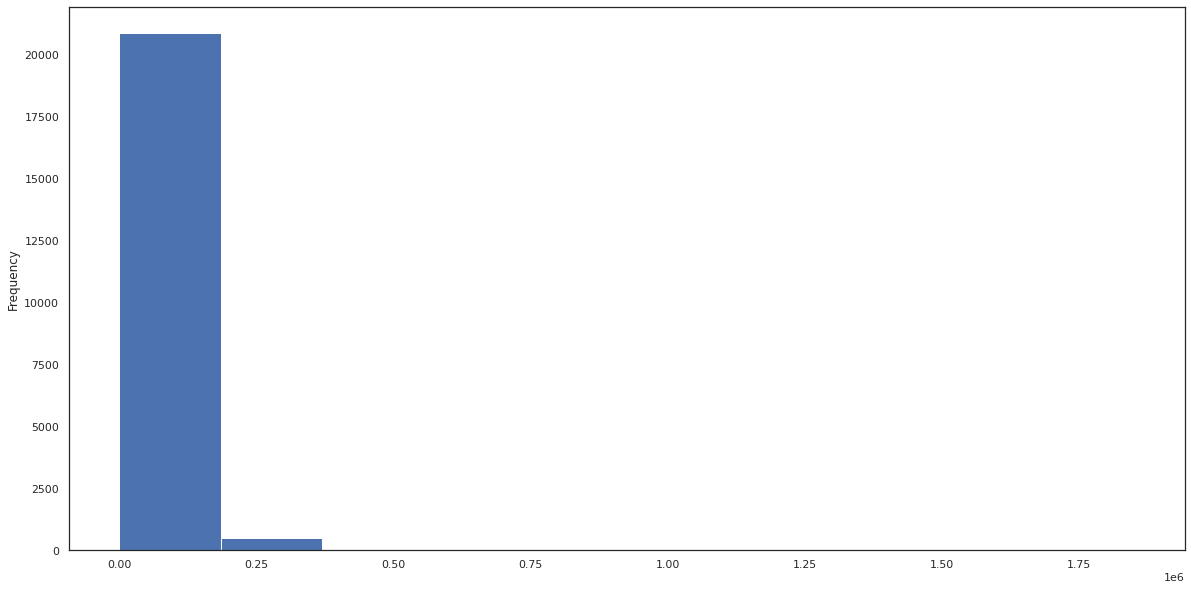

In [177]:
salary_dist = main_salary['SalaryUSD']
salary_dist = salary_dist.plot(kind = 'hist')

1. Scatterplot of Survey Year and SalaryUSD


/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


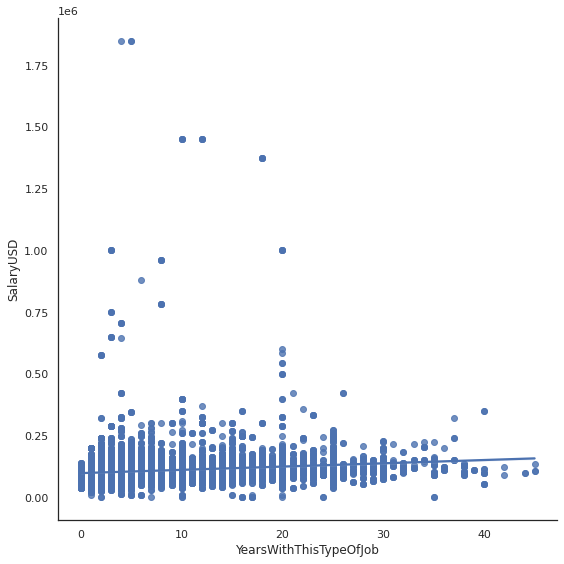

In [178]:
print("1. Scatterplot of Survey Year and SalaryUSD")
sns.lmplot(x = 'YearsWithThisTypeOfJob', y = 'SalaryUSD', data = main_salary, size = 8)


In [179]:
#@title Removing Outliers for Salary

q1_salary = main_salary['SalaryUSD'].quantile(.25)
q2_salary = main_salary['SalaryUSD'].quantile(.50)
q3_salary = main_salary['SalaryUSD'].quantile(.75)

print(q1_salary)
print(q2_salary)
print(q3_salary)

IQR_LoSalary = q1_salary - 1.5 * (q3_salary - q1_salary)
IQR_UpSalary = q3_salary+ 1.5 * (q3_salary - q1_salary)

print(IQR_LoSalary)
print(IQR_UpSalary)

main_salary = (main_salary[(main_salary['SalaryUSD'] > IQR_LoSalary)
                       & (main_salary['SalaryUSD'] < IQR_UpSalary)]
                       )

85000.0
103110.0
125000.0
25000.0
185000.0


In [180]:
#Cleanup outliers from YearsWithThisTypeOfJob

q1_jobyears = main_salary['YearsWithThisTypeOfJob'].quantile(.25)
q2_jobyears = main_salary['YearsWithThisTypeOfJob'].quantile(.50)
q3_jobyears = main_salary['YearsWithThisTypeOfJob'].quantile(.75)

main_salary.head()

print(q1_jobyears,"\n",q2_jobyears,"\n",q3_jobyears)


IQR_LoJobYears = q1_jobyears - 1.5 * (q3_jobyears - q1_jobyears)
IQR_UpJobYears = q3_jobyears + 1.5 * (q3_jobyears - q1_jobyears)

print(IQR_LoJobYears,"\n",IQR_UpJobYears)
 

3.0 
 5.0 
 10.0
-7.5 
 20.5


In [181]:
main_salary = (main_salary[(main_salary['YearsWithThisTypeOfJob'] > IQR_LoJobYears)
                       & (main_salary['YearsWithThisTypeOfJob'] < IQR_UpJobYears)]
                       )


1. Scatterplot of Survey Year and SalaryUSD


/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


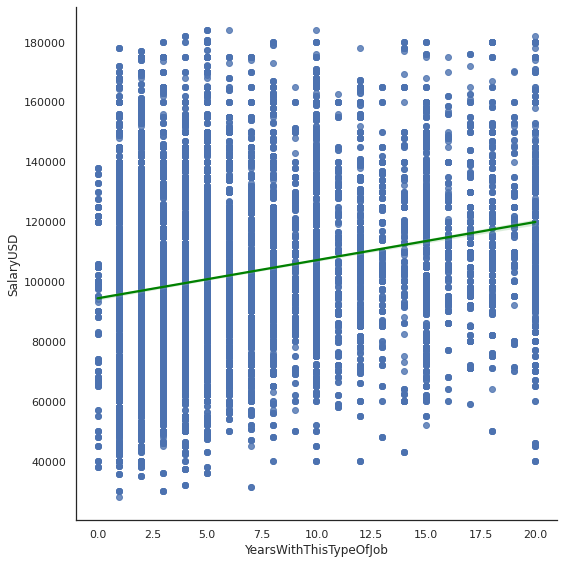

In [182]:
print("1. Scatterplot of Survey Year and SalaryUSD")
sns.lmplot(x = 'YearsWithThisTypeOfJob', y = 'SalaryUSD', data = main_salary, size = 8, line_kws = {'color': 'green'})


In [183]:
#@title  Job Title Column Preparation
main_salary['JobTitle'].value_counts()

DBA                                                                                                           3692
DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)    3407
DBA (Production Focus - build & troubleshoot servers, HA/DR)                                                  1966
Developer: T-SQL                                                                                              1940
Architect                                                                                                     1540
Manager                                                                                                       1341
Developer: Business Intelligence (SSRS, PowerBI, etc)                                                         1264
Analyst                                                                                                       1230
Developer: App code (C#, JS, etc)                                               

In [184]:
main_salary['JobTitle'] = main_salary['JobTitle'].replace(
                                                          ['Analyst', 
                                                           'Analytics consultant',
                                                           'Consultant',
                                                           'Data Scientist',
                                                            'Sr Consultant '
                                                           ], 'Data Analyst/Scientist')

main_salary['JobTitle'] = main_salary['JobTitle'].replace(                                                          
                                                          ['Sales', 
                                                            'Systems Administrator',
                                                            'Technician '], 'Other')

main_salary['JobTitle'] = main_salary['JobTitle'].replace(                                                          
                                                          ['Database Specialist', 
                                                            'DBA',
                                                            'DBA (Development Focus - tunes queries, indexes, does deployments)',
                                                           'DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)',
                                                           'DBA (Production Focus - build & troubleshoot servers, HA/DR)',
                                                           'DBA / BI Developer',
                                                           'Principal database engineer'], 'DBA')

main_salary['JobTitle'] = main_salary['JobTitle'].replace(                                                          
                                                          ['Developer: App code (C#, JS, etc)', 
                                                            'Developer: Business Intelligence (SSRS, PowerBI, etc)',
                                                            'Developer: T-SQL',
                                                           'DevOps, Sr Software Engineer DBA'], 'Software Dev')



In [185]:
main_salary['JobTitle'].value_counts()

DBA                       9884
Software Dev              4396
Architect                 1540
Data Analyst/Scientist    1362
Manager                   1341
Engineer                   970
Other                      284
Name: JobTitle, dtype: int64

In [186]:
JobTitle_indic = pd.get_dummies(main_salary.JobTitle)
JobTitle_indic

,Architect,DBA,Data Analyst/Scientist,Engineer,Manager,Other,Software Dev
2,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1
6,0,0,0,0,0,0,1
7,0,0,0,0,1,0,0
8,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
32762,0,1,0,0,0,0,0
32763,0,1,0,0,0,0,0
32764,0,0,0,0,0,0,1
32766,0,1,0,0,0,0,0


In [187]:
col = 'Other'
JobTitle_indic = JobTitle_indic.loc[:, JobTitle_indic.columns != col]
JobTitle_indic

,Architect,DBA,Data Analyst/Scientist,Engineer,Manager,Software Dev
2,0,1,0,0,0,0
4,0,0,0,0,0,1
6,0,0,0,0,0,1
7,0,0,0,0,1,0
8,0,1,0,0,0,0
...,...,...,...,...,...,...
32762,0,1,0,0,0,0
32763,0,1,0,0,0,0
32764,0,0,0,0,0,1
32766,0,1,0,0,0,0


In [188]:
main_salary = pd.concat([main_salary, JobTitle_indic], axis = 1) #Other is the reference variable

In [189]:
#@title  Education Column Preparation
main_salary['Education'].value_counts()

Bachelors (4 years)                 7139
Not Asked                           3572
Masters                             2115
No, I never have                    1893
None (no degree completed)          1844
Associates (2 years)                1382
Yes, but they expired                954
Yes, and they're currently valid     809
Doctorate/PhD                         69
Name: Education, dtype: int64

In [190]:
main_salary['Education'] = main_salary['Education'].replace(                                                          
                                                          ['No, I never have', 
                                                            'None (no degree completed)']
                                                            , 'No Degree')

main_salary['Education'] = main_salary['Education'].replace(                                                          
                                                          ["Yes, and they're currently valid", 
                                                            "Yes, but they expired"]
                                                            , 'Some Degree')



In [191]:
main_salary['Education'].value_counts()

Bachelors (4 years)     7139
No Degree               3737
Not Asked               3572
Masters                 2115
Some Degree             1763
Associates (2 years)    1382
Doctorate/PhD             69
Name: Education, dtype: int64

In [192]:
Ed_indic = pd.get_dummies(main_salary.Education)
main_salary = pd.concat([main_salary, Ed_indic], axis = 1)

In [193]:
main_salary.head()

,Survey Year,SalaryUSD,Education,EmploymentStatus,JobTitle,Gender,YearsWithThisTypeOfJob,Architect,DBA,Data Analyst/Scientist,Engineer,Manager,Software Dev,Associates (2 years),Bachelors (4 years),Doctorate/PhD,Masters,No Degree,Not Asked,Some Degree
2,2021,105000.0,Not Asked,Full time employee,DBA,Male,6,0,1,0,0,0,0,0,0,0,0,0,1,0
4,2021,98800.0,Not Asked,Full time employee,Software Dev,Male,5,0,0,0,0,0,1,0,0,0,0,0,1,0
6,2021,100800.0,Not Asked,Full time employee,Software Dev,Male,14,0,0,0,0,0,1,0,0,0,0,0,1,0
7,2021,160000.0,Not Asked,Full time employee of a consulting/contracting...,Manager,Female,9,0,0,0,0,1,0,0,0,0,0,0,1,0
8,2021,105000.0,Not Asked,Full time employee,DBA,Male,2,0,1,0,0,0,0,0,0,0,0,0,1,0


In [194]:
#@title  Employment Status Column Preparation
main_salary['EmploymentStatus'].value_counts()

Full time employee                                                   18239
Full time employee of a consulting/contracting company                1217
Independent consultant, contractor, freelancer,  or company owner      215
Independent or freelancer or company owner                              80
Part time                                                               26
Name: EmploymentStatus, dtype: int64

In [195]:
main_salary['EmploymentStatus'] = main_salary['EmploymentStatus'].replace(                                                          
                                                          ['Full time employee',
                                                           'Full time employee of a consulting/contracting company']
                                                            , 'Full Time Employee')

main_salary['EmploymentStatus'] = main_salary['EmploymentStatus'].replace(                                                          
                                                          ['Independent consultant, contractor, freelancer,  or company owner', 
                                                          'Independent or freelancer or company owner'
                                                          ]
                                                            , 'Independent Consultant')


In [196]:
main_salary['EmploymentStatus'].value_counts()

Full Time Employee        19456
Independent Consultant      295
Part time                    26
Name: EmploymentStatus, dtype: int64

In [197]:
Emp_stat_indic = pd.get_dummies(main_salary.EmploymentStatus)
main_salary = pd.concat([main_salary, Emp_stat_indic], axis = 1)

Emp_stat_indic = Emp_stat_indic.drop('Part time', axis = 1)
Emp_stat_indic


,Full Time Employee,Independent Consultant
2,1,0
4,1,0
6,1,0
7,1,0
8,1,0
...,...,...
32762,1,0
32763,1,0
32764,1,0
32766,1,0


In [198]:
#@title  Gender Column Preparation
main_salary['Gender'].value_counts()

Male                                                    9360
Not Asked                                               5286
Other                                                   3656
Female                                                  1289
Prefer not to say                                        140
Non-binary/third gender                                   25
Meat Popsicle                                              2
toad frog                                                  2
Attack Helicopter. (serious dude, gender questions?)       2
Cyborg                                                     2
This question is inappropriate.                            2
Attack Helicopter                                          2
Alien                                                      2
Dragon                                                     2
Attack helicopter                                          1
I am Batman                                                1
mosquito                

In [199]:
#@title Clustering

!pip install umap-learn

reducer = umap.UMAP()



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [200]:
X = salary['Gender'].sample(15000)

In [201]:
X = X.fillna("None")

In [202]:
cluster_labels = pd.DataFrame()

In [203]:
cluster_labels['Gender'] = X

In [204]:
X.shape

(15000,)

In [205]:

vectorizer = CountVectorizer(max_features=100)
X = vectorizer.fit_transform(X)
vectorizer.get_feature_names()

count_vect_df = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
count_vect_df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,alien,also,am,any,asked,attack,batman,binary,confused,cyborg,...,question,questions,race,say,serious,third,this,to,toad,vulcan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
embedding = reducer.fit_transform(count_vect_df)
embedding.shape

(15000, 2)

In [207]:
embedding

array([[-8.1311858e-01, -8.5655879e-03],
       [ 5.7923613e+00, -9.6043167e+00],
       [ 3.3104181e+00,  1.6722858e+01],
       ...,
       [ 5.8749876e+00, -9.9082031e+00],
       [ 3.1171155e+00,  1.6128763e+01],
       [-2.9255904e-02,  9.4697034e-01]], dtype=float32)

In [208]:
#@title Find ideal number of clusters from 2 to 10, 3 iterations for each cluster
def drawSSEPlot(X_std, n_clusters=10, max_iter=300, tol=1e-04, init='k-means++', n_init=3, algorithm='auto'): 

    Errors = []
    for i in range(2, n_clusters+1): # Number of clusters(K) goes from 2 to 10
      km = KMeans(n_clusters=i, max_iter=max_iter, tol=tol, init=init, n_init=n_init, random_state=1, algorithm=algorithm)
      km.fit_predict(X_std)
      Errors.append(km.inertia_)
      cluster_labels['labels'] = km.labels_
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(2, n_clusters+1), Errors, color='blue')
    plt.xlabel('No. of Clusters', fontsize=15)
    plt.ylabel('SSE', fontsize=15)
    plt.title('SSE vs No. Of Clusters', fontsize=15)
    plt.grid()
    plt.show()

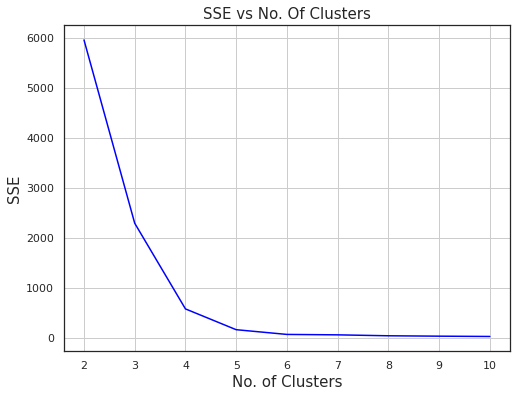

In [209]:
#@title Plotting SSE vs number of clusters
drawSSEPlot(count_vect_df)

In [210]:
km = KMeans(n_clusters=4, n_init=3, random_state=1)
km.fit_predict(X)
SSE = km.inertia_
cluster_labels['labels'] = km.labels_

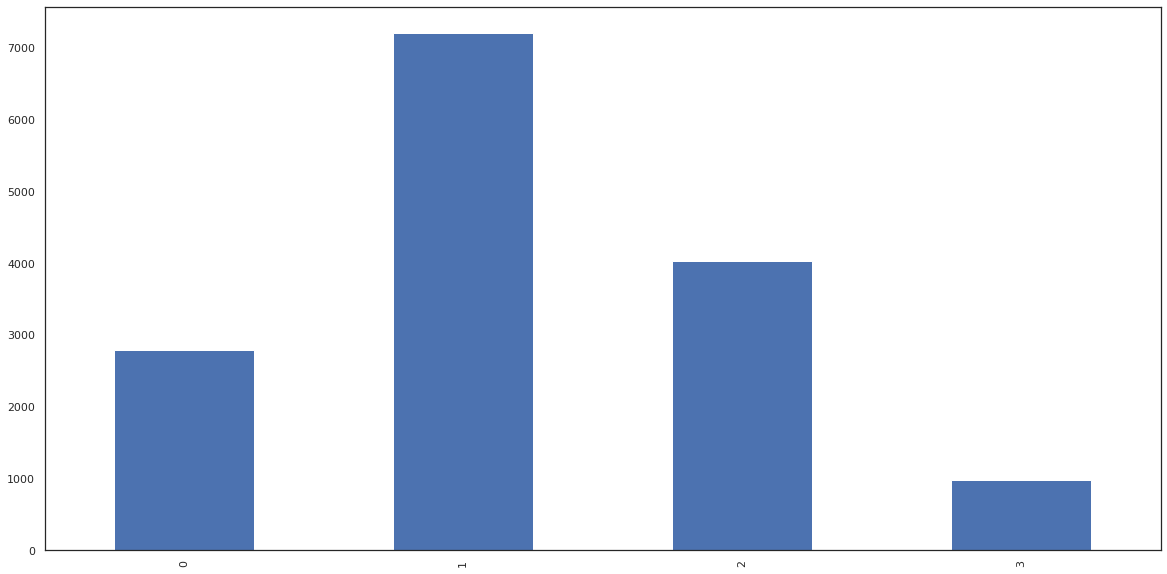

In [211]:
cluster_labels.labels.value_counts().sort_index().plot(kind='bar')

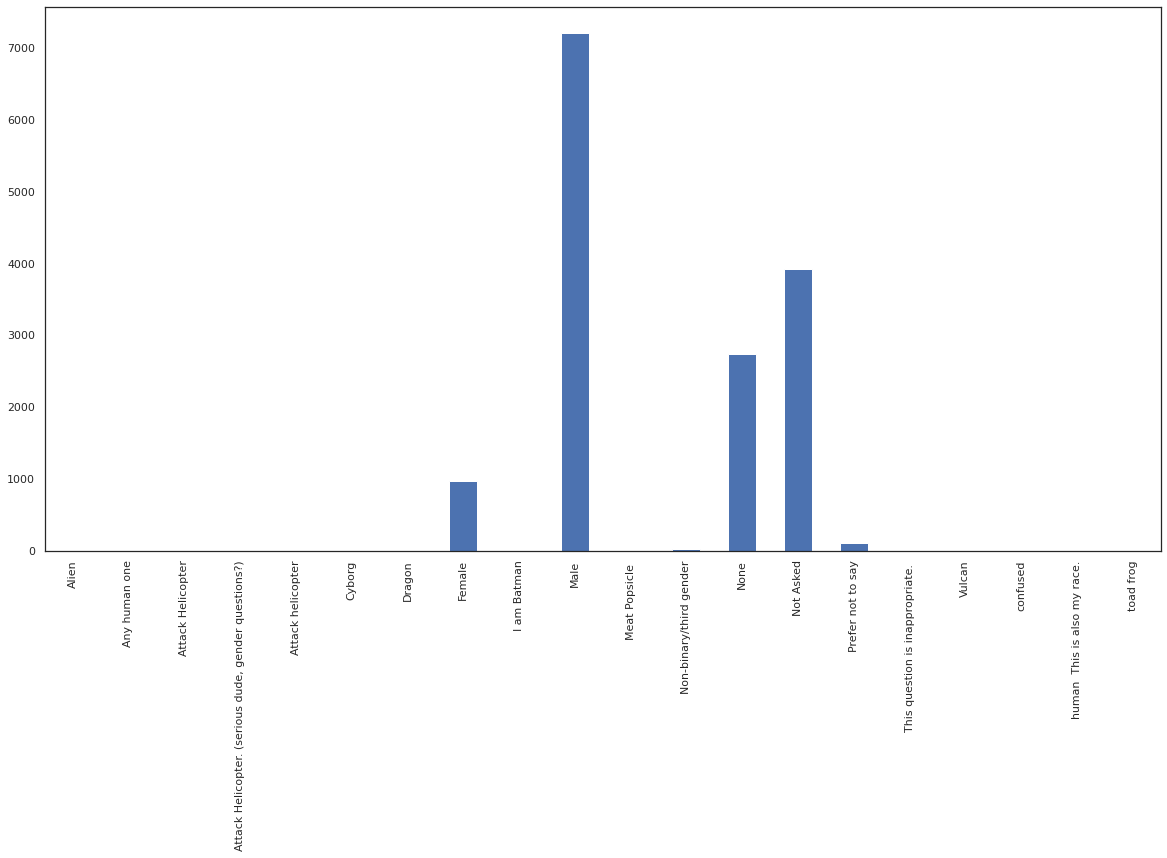

In [212]:
cluster_labels['Gender'].value_counts().sort_index().plot(kind='bar')

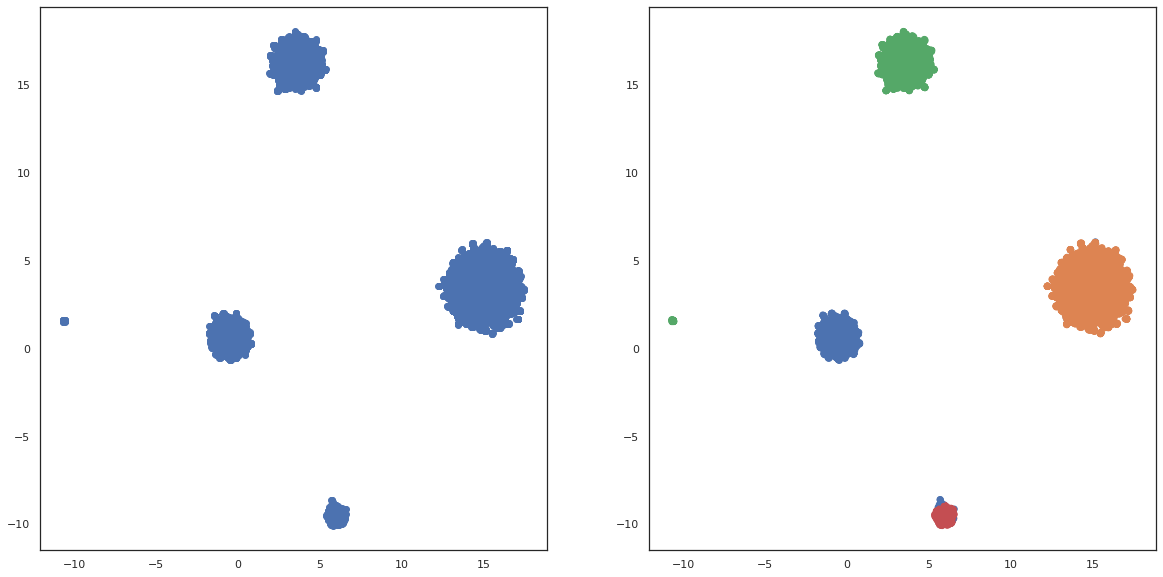

In [213]:

sns.set(style='white', context='notebook', rc={'figure.figsize':(20,10)})

fig, ax = plt.subplots(1,2)
ax[0].scatter(
    embedding[:, 0],
    embedding[:, 1]
    )

ax[1].scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette(n_colors=15)[x] for x in cluster_labels.labels]
    )

In [214]:
cluster_labels.loc[cluster_labels.labels ==0].sample(50).Gender

11701    None
12049    None
15201    None
13955    None
12620    None
15601    None
12740    None
17187    None
16705    None
14801    None
17023    None
17113    None
11359    None
13205    None
12624    None
13186    None
16633    None
13444    None
17006    None
12078    None
14278    None
14162    None
14226    None
16564    None
16317    None
16928    None
14473    None
14334    None
16027    None
14472    None
17050    None
16709    None
12334    None
15099    None
12970    None
17184    None
17226    None
11857    None
15348    None
17260    None
16087    None
16365    None
12118    None
17255    None
15385    None
14626    None
16957    None
16309    None
16198    None
17158    None
Name: Gender, dtype: object

In [215]:
#@title Manual Grouping for Gender values
main_salary['Gender'] = np.where(main_salary['Gender']=='Male', 'Male',
                            np.where(main_salary['Gender']=='Female', 'Female',
                            np.where(main_salary['Gender']=='Non-binary/third gender', 'Non-binary/third gender',
                            np.where(main_salary['Gender']=='Not Asked','Not Asked',
                            'Prefer Not to Say'
                            ))))

In [216]:
main_salary['Gender'].value_counts()

Male                       9360
Not Asked                  5286
Prefer Not to Say          3817
Female                     1289
Non-binary/third gender      25
Name: Gender, dtype: int64

In [217]:
Gender_indicators = pd.get_dummies(main_salary.Gender)

In [218]:
Gender_indicators

,Female,Male,Non-binary/third gender,Not Asked,Prefer Not to Say
2,0,1,0,0,0
4,0,1,0,0,0
6,0,1,0,0,0
7,1,0,0,0,0
8,0,1,0,0,0
...,...,...,...,...,...
32762,1,0,0,0,0
32763,0,1,0,0,0
32764,0,1,0,0,0
32766,0,1,0,0,0


In [219]:
col = 'Not Asked'
Gender_indicators = Gender_indicators.loc[:, Gender_indicators.columns != col] # Not Asked is the reference variable
Gender_indicators

,Female,Male,Non-binary/third gender,Prefer Not to Say
2,0,1,0,0
4,0,1,0,0
6,0,1,0,0
7,1,0,0,0
8,0,1,0,0
...,...,...,...,...
32762,1,0,0,0
32763,0,1,0,0
32764,0,1,0,0
32766,0,1,0,0


In [220]:
#@title  Outcome and Explanatory Variables
outcome = salary['SalaryUSD']
explanatory = salary[['Education', 'EmploymentStatus', 'JobTitle', 'Gender','YearsWithThisTypeOfJob']]


https://plotly.com/python/choropleth-maps/

In [221]:
#@title Indicators for Qualitative explanatory variables
title_indicators = pd.get_dummies(salary.JobTitle)
title_indicators

,Analyst,Analytics consultant,Architect,Consultant,DBA,"DBA (Development Focus - tunes queries, indexes, does deployments)",DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers),"DBA (Production Focus - build & troubleshoot servers, HA/DR)",Data Scientist,Database Specialist,...,"Developer: App code (C#, JS, etc)","Developer: Business Intelligence (SSRS, PowerBI, etc)",Developer: T-SQL,Engineer,Manager,Other,Principal database engineer,Sr Consultant,Systems Administrator,Technician
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32834,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32835,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32837,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32838,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
#@title Variables Correlation
#sns.pairplot(salary, vars = ["SalaryUSD", 'YearsWithThisTypeofJob'])

In [223]:
#@title Multiple Regression Model using Education as an explanatory variable
# Salary as outcome variable 
#Education as explanatory variable

In [224]:
ed_main_salary = main_salary
ed_main_salary['intercept'] = 1
y = ed_main_salary['SalaryUSD']
x = ed_main_salary[['intercept', 'Associates (2 years)', 'Bachelors (4 years)', 'Masters', 'No Degree', 'Not Asked', 'Some Degree']]




In [225]:
Ed_mr = sm.OLS(y, x, missing = 'drop').fit()
print('Below is the result of Multiple Regression model to predict using the chosen variables: \n', Ed_mr.summary())


Below is the result of Multiple Regression model to predict using the chosen variables: 
                             OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     61.01
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           2.80e-75
Time:                        02:52:52   Log-Likelihood:            -2.3013e+05
No. Observations:               19777   AIC:                         4.603e+05
Df Residuals:                   19770   BIC:                         4.603e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [226]:
#@title Multiple Regression Model using Employment Status as an explanatory variable
# Salary as outcome variable 
#Employment Status  as explanatory variable

In [227]:
main_salary['intercept'] = 1

In [228]:
y = main_salary['SalaryUSD']
x = main_salary[['intercept', 'Full Time Employee', 'Independent Consultant']]

Emp_mr = sm.OLS(y, x, missing = 'drop').fit()
print('Below is the result of Multiple Regression model to predict  using the chosen variables: \n', Emp_mr.summary())


Below is the result of Multiple Regression model to predict  using the chosen variables: 
                             OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     141.0
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           1.65e-61
Time:                        02:52:52   Log-Likelihood:            -2.3017e+05
No. Observations:               19777   AIC:                         4.603e+05
Df Residuals:                   19774   BIC:                         4.604e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [229]:
#@title Multiple Regression Model using Job Title as an explanatory variable
# Salary as outcome variable 
#Job Title as explanatory variable

In [230]:
JobTitle_indic['Intercept'] = 1 

In [231]:
JobTitle_indic.head()

,Architect,DBA,Data Analyst/Scientist,Engineer,Manager,Software Dev,Intercept
2,0,1,0,0,0,0,1
4,0,0,0,0,0,1,1
6,0,0,0,0,0,1,1
7,0,0,0,0,1,0,1
8,0,1,0,0,0,0,1


In [232]:
X = JobTitle_indic

In [233]:
y = main_salary['SalaryUSD']


In [234]:
mul_reg = sm.OLS(y, X, missing='drop').fit()
print(mul_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     452.7
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        02:52:52   Log-Likelihood:            -2.2904e+05
No. Observations:               19777   AIC:                         4.581e+05
Df Residuals:                   19770   BIC:                         4.581e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Architect               3.58

In [235]:
#@title Multiple Regression Model using Gender as an explanatory variable
# Salary as outcome variable 
#Gender as explanatory variable

In [236]:
X = Gender_indicators
X['intercept'] = 1
y = main_salary['SalaryUSD']
X

,Female,Male,Non-binary/third gender,Prefer Not to Say,intercept
2,0,1,0,0,1
4,0,1,0,0,1
6,0,1,0,0,1
7,1,0,0,0,1
8,0,1,0,0,1
...,...,...,...,...,...
32762,1,0,0,0,1
32763,0,1,0,0,1
32764,0,1,0,0,1
32766,0,1,0,0,1


In [237]:
mul_reg = sm.OLS(y, X, missing='drop').fit()
print(mul_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     16.23
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           2.83e-13
Time:                        02:52:52   Log-Likelihood:            -2.3028e+05
No. Observations:               19777   AIC:                         4.606e+05
Df Residuals:                   19772   BIC:                         4.606e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Female                  -2

In [238]:
#@title Multiple Regression Model using YearsWithThisTypeOfJob as an explanatory variable
# Salary as outcome variable 
#YearsWithThisTypeOfJob as explanatory variable

In [239]:
X=pd.DataFrame()

In [240]:
X=pd.DataFrame(main_salary['YearsWithThisTypeOfJob'])

X['intercept'] = 1
y = main_salary['SalaryUSD']
X

,YearsWithThisTypeOfJob,intercept
2,6,1
4,5,1
6,14,1
7,9,1
8,2,1
...,...,...
32762,19,1
32763,5,1
32764,5,1
32766,3,1


In [241]:
mul_reg = sm.OLS(y, X, missing='drop').fit()
print(mul_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1271.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          8.16e-270
Time:                        02:52:53   Log-Likelihood:            -2.2969e+05
No. Observations:               19777   AIC:                         4.594e+05
Df Residuals:                   19775   BIC:                         4.594e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YearsWithThisTypeOfJob  1275

In [242]:
#@title Predicting annual salary based on Years of experience

Salary = 1274.3895*(3) +9.45e+04 
Salary

98323.1685

In [243]:
#@title Multiple Regression Model using Gender and YearsWithThisTypeOfJob as an explanatory variable
# Salary as outcome variable 

In [244]:
X_2 = Gender_indicators
X_2['YearsWithThisTypeOfJob']=main_salary.YearsWithThisTypeOfJob
X_2['intercept'] = 1
y = main_salary['SalaryUSD']

Gender_indicators

,Female,Male,Non-binary/third gender,Prefer Not to Say,intercept,YearsWithThisTypeOfJob
2,0,1,0,0,1,6
4,0,1,0,0,1,5
6,0,1,0,0,1,14
7,1,0,0,0,1,9
8,0,1,0,0,1,2
...,...,...,...,...,...,...
32762,1,0,0,0,1,19
32763,0,1,0,0,1,5
32764,0,1,0,0,1,5
32766,0,1,0,0,1,3


In [245]:
X_2

,Female,Male,Non-binary/third gender,Prefer Not to Say,intercept,YearsWithThisTypeOfJob
2,0,1,0,0,1,6
4,0,1,0,0,1,5
6,0,1,0,0,1,14
7,1,0,0,0,1,9
8,0,1,0,0,1,2
...,...,...,...,...,...,...
32762,1,0,0,0,1,19
32763,0,1,0,0,1,5
32764,0,1,0,0,1,5
32766,0,1,0,0,1,3


In [246]:
mul_reg = sm.OLS(y, X_2, missing='drop').fit()
print(mul_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     267.5
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          1.01e-277
Time:                        02:52:53   Log-Likelihood:            -2.2966e+05
No. Observations:               19777   AIC:                         4.593e+05
Df Residuals:                   19771   BIC:                         4.594e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Female                  -3

In [247]:
#@title Estimating Salary based on Gender and Years of Experience
record = [1,0,0,0,1,3]
print(mul_reg.predict(record))

[94005.49947563]


In [248]:
#@title Multiple Regression Model using Job Title and YearsWithThisTypeOfJob as explanatory variables
# Salary as outcome variable 
#Job Title and YearsWithThisTypeOfJob as an explanatory variables

In [249]:
X = JobTitle_indic
X["YearsWithThisTypeOfJob"] = main_salary.YearsWithThisTypeOfJob
X

,Architect,DBA,Data Analyst/Scientist,Engineer,Manager,Software Dev,Intercept,YearsWithThisTypeOfJob
2,0,1,0,0,0,0,1,6
4,0,0,0,0,0,1,1,5
6,0,0,0,0,0,1,1,14
7,0,0,0,0,1,0,1,9
8,0,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...
32762,0,1,0,0,0,0,1,19
32763,0,1,0,0,0,0,1,5
32764,0,0,0,0,0,1,1,5
32766,0,1,0,0,0,0,1,3


In [250]:
y = main_salary['SalaryUSD']

In [251]:
mul_reg = sm.OLS(y, X, missing='drop').fit()
print(mul_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     615.6
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        02:52:53   Log-Likelihood:            -2.2836e+05
No. Observations:               19777   AIC:                         4.567e+05
Df Residuals:                   19769   BIC:                         4.568e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Architect               3.69

In [252]:
#@title Multiple Regression Model using Education, Job Title and YearsWithThisTypeOfJob as explanatory variables
# Salary as outcome variable 
#Education, Job Title and YearsWithThisTypeOfJob as explanatory variables

In [253]:
feature_cols = ['intercept', 'Associates (2 years)', 'Bachelors (4 years)', 'Masters', 'No Degree', 'Not Asked', 'Some Degree']
X[feature_cols] = main_salary[feature_cols]


In [254]:
mul_reg = sm.OLS(y, X, missing='drop').fit()
print(mul_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     360.2
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        02:52:53   Log-Likelihood:            -2.2821e+05
No. Observations:               19777   AIC:                         4.564e+05
Df Residuals:                   19763   BIC:                         4.566e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Architect                3.6

In [255]:
#@title Multiple Regression Model using Education and Gender as explanatory variables
# Salary as outcome variable 
#Education and Gender as explanatory variables

In [256]:
X = Gender_indicators
feature_cols = ['intercept', 'Associates (2 years)', 'Bachelors (4 years)', 'Masters', 'No Degree', 'Not Asked', 'Some Degree',]
X[feature_cols] = main_salary[feature_cols]
X = X.drop('YearsWithThisTypeOfJob', axis=1)

In [257]:
X

,Female,Male,Non-binary/third gender,Prefer Not to Say,intercept,Associates (2 years),Bachelors (4 years),Masters,No Degree,Not Asked,Some Degree
2,0,1,0,0,1,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,0
6,0,1,0,0,1,0,0,0,0,1,0
7,1,0,0,0,1,0,0,0,0,1,0
8,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
32762,1,0,0,0,1,0,1,0,0,0,0
32763,0,1,0,0,1,0,1,0,0,0,0
32764,0,1,0,0,1,0,1,0,0,0,0
32766,0,1,0,0,1,0,1,0,0,0,0


In [258]:
mul_reg = sm.OLS(y, X, missing='drop').fit()
print(mul_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     46.41
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           2.77e-92
Time:                        02:52:53   Log-Likelihood:            -2.3008e+05
No. Observations:               19777   AIC:                         4.602e+05
Df Residuals:                   19766   BIC:                         4.603e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Female                  -4

In [259]:
#@title All explanatory variables for multiple regression

#explanatory = salary[['Education', 'EmploymentStatus', 'JobTitle', 'Gender','YearsWithThisTypeOfJob']]


In [260]:
main_salary.Education.value_counts()

Bachelors (4 years)     7139
No Degree               3737
Not Asked               3572
Masters                 2115
Some Degree             1763
Associates (2 years)    1382
Doctorate/PhD             69
Name: Education, dtype: int64

In [261]:
main_salary.Gender.value_counts()

Male                       9360
Not Asked                  5286
Prefer Not to Say          3817
Female                     1289
Non-binary/third gender      25
Name: Gender, dtype: int64

In [262]:
ed_dummies = pd.get_dummies(main_salary.Education)
ed_dummies.columns

ed_dummies=ed_dummies.rename(columns={"Not Asked": "Education Not Asked"})


In [263]:
employment_dummies = pd.get_dummies(main_salary.EmploymentStatus)
jobt_dummies = pd.get_dummies(main_salary.JobTitle)
gender_dummies = pd.get_dummies(main_salary.Gender)
experience = main_salary.YearsWithThisTypeOfJob
SalaryUSD = main_salary.SalaryUSD

In [264]:
X=[]

In [265]:
X = pd.concat([ed_dummies, employment_dummies, jobt_dummies, gender_dummies],axis = 1)

X['experience'] = experience
X['intercept'] = 1


In [266]:
X = X.drop('Prefer Not to Say',axis=1) #reference variable -- gender

In [267]:
X.columns

Index(['Associates (2 years)', 'Bachelors (4 years)', 'Doctorate/PhD',
       'Masters', 'No Degree', 'Education Not Asked', 'Some Degree',
       'Full Time Employee', 'Independent Consultant', 'Part time',
       'Architect', 'DBA', 'Data Analyst/Scientist', 'Engineer', 'Manager',
       'Other', 'Software Dev', 'Female', 'Male', 'Non-binary/third gender',
       'Not Asked', 'experience', 'intercept'],
      dtype='object')

In [268]:
X.shape

(19777, 23)

In [269]:
y=main_salary.SalaryUSD

In [270]:
mul_reg = sm.OLS(y, X, missing='drop').fit()
print(mul_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     273.1
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        02:52:54   Log-Likelihood:            -2.2800e+05
No. Observations:               19777   AIC:                         4.560e+05
Df Residuals:                   19757   BIC:                         4.562e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Associates (2 years)    -2

In [271]:
#@title Estimating Salary based on all explanatory variables
record = [0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1]
print(mul_reg.predict(record))

[114375.69722285]


In [272]:
107442.79969071-5533.0322


101909.76749071

In [273]:
main_salary['Salary_category'] = pd.cut(x=main_salary['SalaryUSD'], bins=[0, 50000, 75000, 100000, 125000, 150000, 99999999999],
                     labels=['0-50K', '50K-75K', '75K-100K', '100K-125K', '125K-150K',
                             '150K+'])



In [274]:
main_salary['Salary_category'].value_counts()


75K-100K     6349
100K-125K    6140
50K-75K      3002
125K-150K    2924
150K+         956
0-50K         406
Name: Salary_category, dtype: int64

In [275]:
main_salary.head()

,Survey Year,SalaryUSD,Education,EmploymentStatus,JobTitle,Gender,YearsWithThisTypeOfJob,Architect,DBA,Data Analyst/Scientist,...,Doctorate/PhD,Masters,No Degree,Not Asked,Some Degree,Full Time Employee,Independent Consultant,Part time,intercept,Salary_category
2,2021,105000.0,Not Asked,Full Time Employee,DBA,Male,6,0,1,0,...,0,0,0,1,0,1,0,0,1,100K-125K
4,2021,98800.0,Not Asked,Full Time Employee,Software Dev,Male,5,0,0,0,...,0,0,0,1,0,1,0,0,1,75K-100K
6,2021,100800.0,Not Asked,Full Time Employee,Software Dev,Male,14,0,0,0,...,0,0,0,1,0,1,0,0,1,100K-125K
7,2021,160000.0,Not Asked,Full Time Employee,Manager,Female,9,0,0,0,...,0,0,0,1,0,1,0,0,1,150K+
8,2021,105000.0,Not Asked,Full Time Employee,DBA,Male,2,0,1,0,...,0,0,0,1,0,1,0,0,1,100K-125K


In [276]:
#@title Decision Tree

# X = []
X = main_salary.YearsWithThisTypeOfJob.reset_index(drop = True)
X = np.array(X)
# X = main_salary.iloc[:,7].values
#y = main_salary.iloc[:,2].values
y = main_salary.Salary_category
y = np.array(y)

In [277]:
y

array(['100K-125K', '75K-100K', '100K-125K', ..., '100K-125K',
       '125K-150K', '75K-100K'], dtype=object)

In [278]:
X

array([ 6,  5, 14, ...,  5,  3,  1])

In [279]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 75% training and 25% test

In [280]:
y_test.shape

(4945,)

In [281]:
# Create Decision Tree classifer object
clfg = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)

# Train Decision Tree Classifer
clfg.fit(X_train.reshape(-1, 1), y_train)

DecisionTreeClassifier(max_depth=5)

In [282]:
#Predict the response for test dataset
y_pred_g = clfg.predict(X_test.reshape(-1, 1))

In [283]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_g))

Accuracy: 0.3551061678463094


In [284]:
#y_pred = regressor.predict(X_test.reshape(-1, 1))

y_pred_g = clfg.predict([[0]])
y_pred_g

array(['100K-125K'], dtype=object)

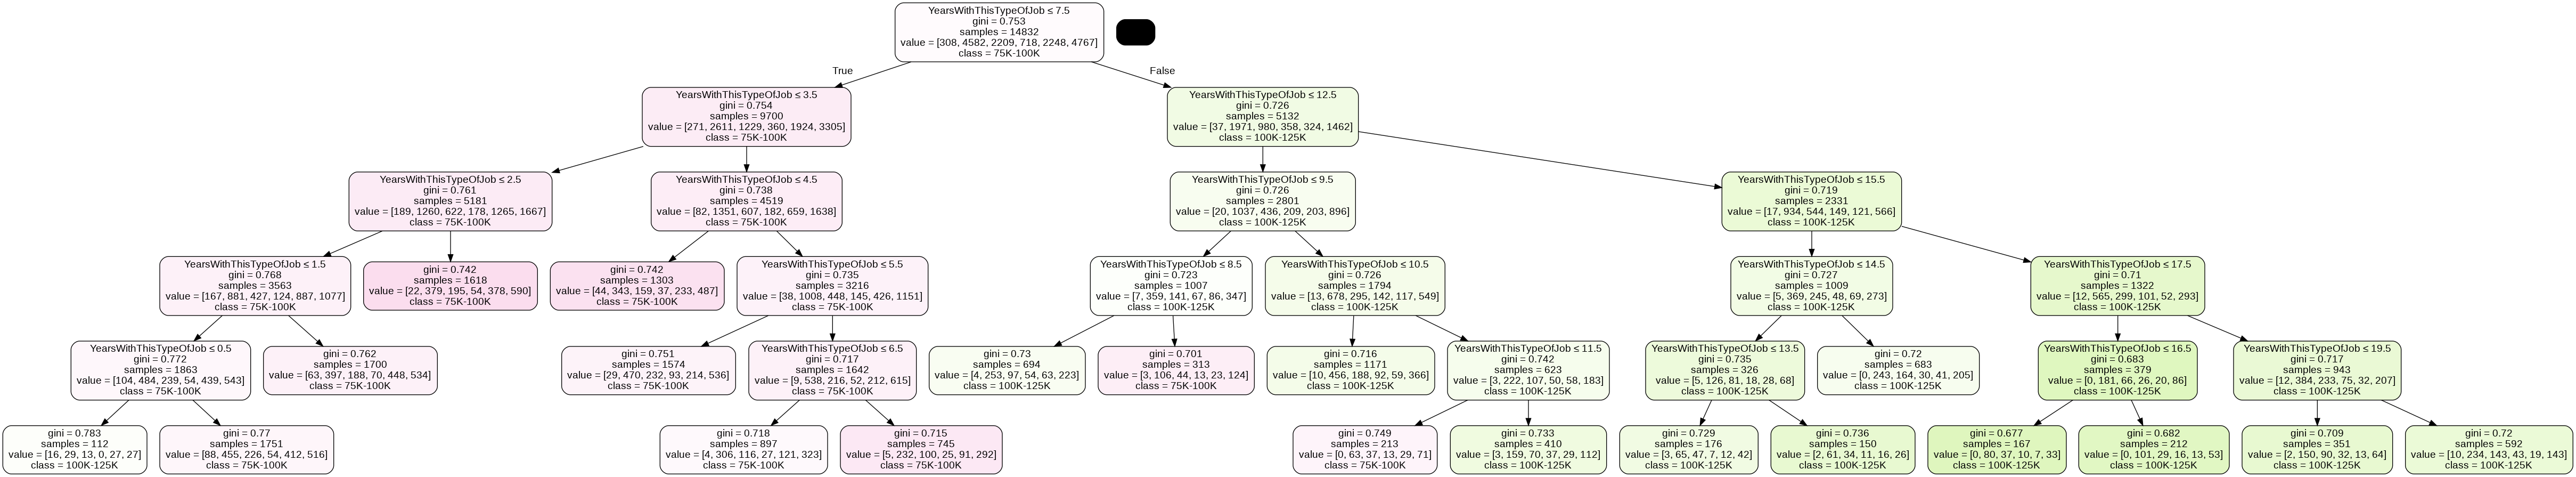

In [285]:
#@title Visualizing tree with GINI


dot_data = StringIO()
export_graphviz(clfg, out_file=dot_data,  
                filled=True, rounded=True, 
                special_characters=True
                , feature_names = ['YearsWithThisTypeOfJob']
                , class_names = y_train) #use feature_columns for labels
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dt_salary.png')
Image(graph.create_png())

In [286]:
#@title Random forest


In [287]:
clf_rf = RandomForestClassifier(criterion = 'gini',n_estimators=100)

In [288]:
clfg.fit(X_train.reshape(-1, 1), y_train)

y_pred_g = clfg.predict(X_test.reshape(-1, 1))

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_g))

Accuracy: 0.3551061678463094


In [289]:
 # Step 4 - Predict
y_pred_g = clfg.predict([[10]])
y_pred_g

array(['100K-125K'], dtype=object)